# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pysheds.grid import Grid
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Instatiate a grid from a DEM raster

Data from USGS hydrosheds project: https://hydrosheds.cr.usgs.gov/datadownload.php

In [2]:
grid = Grid.from_raster('../data/n30w100_con', data_name='dem')

In [3]:
grid.read_raster('../data/n30w100_dir', data_name='dir')

In [4]:
grid.accumulation(data='dir', out_name='acc')

# Compute height above nearest drainage (HAND)

In [5]:
hand = grid.compute_hand('dir', 'dem', grid.acc > 200, inplace=False)

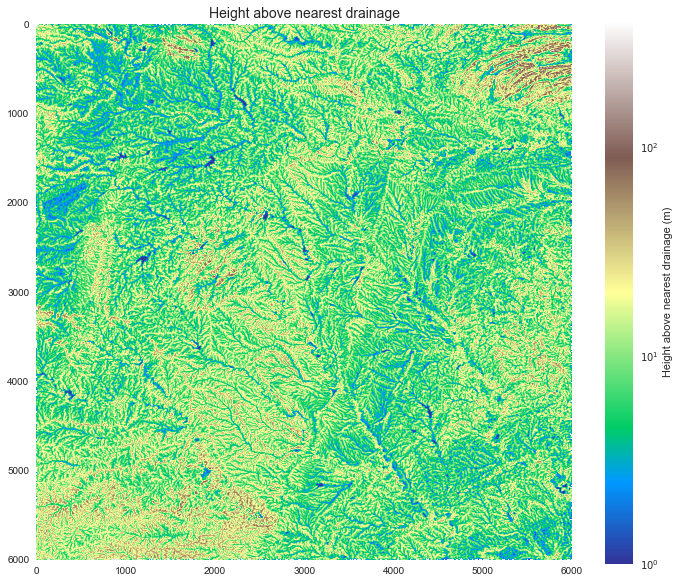

In [6]:
fig, ax = plt.subplots(figsize=(12,10))
plt.imshow(hand + 1, zorder=1, cmap='terrain', interpolation='bilinear',
           norm=colors.LogNorm(vmin=1, vmax=np.nanmax(hand)))
plt.colorbar(label='Height above nearest drainage (m)')
plt.title('Height above nearest drainage', size=14)

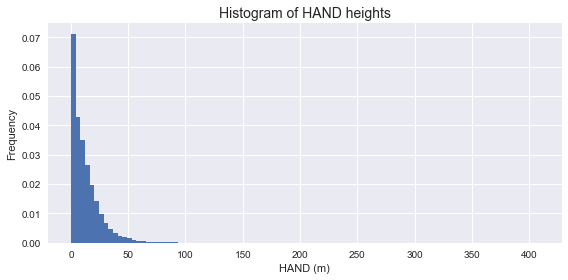

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
h = plt.hist(hand[~np.isnan(hand)], bins=100, normed=True)
plt.title('Histogram of HAND heights', size=14)
plt.ylabel('Frequency')
plt.xlabel('HAND (m)')
plt.tight_layout()

In [8]:
_, bins = np.histogram(hand[~np.isnan(hand) & (hand < 50)], bins=5)

In [9]:
classes = np.digitize(hand, bins)

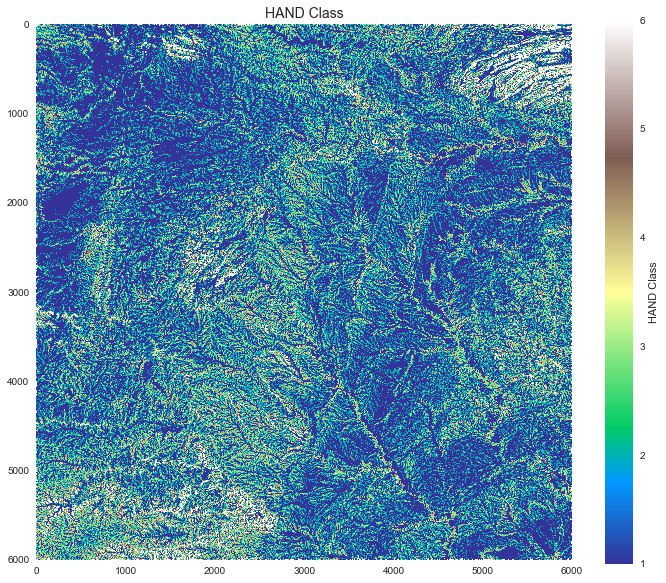

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
plt.imshow(classes, zorder=1, cmap='terrain')
plt.colorbar(label='HAND Class')
plt.title('HAND Class', size=14)